# Overview

### Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Evaluation
- Goal: The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.

- Metric: This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# Summary

### Chapter 1: Exploratory Data Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Unique Labels
- 1.3: Visual Analysis

### Chapter 2: Data Wrangling
- 2.1: Splitting Data
- 2.2: Scaling Pixel Values
- 2.3: Data Reshaping

### Chapter 3: Building Machine Learning Models
- 3.1: Feedforward NN Model
- 3.2: CNN Model

### Chapter 4: Final Conclusions
- 4.1: Model Prediction Visualization
- 4.2: Generate and Save Prediction Submission

# Chapter 1: Exploratory Data Analysis

In this section, we take a close look at our data to understand what it can tell us. 

This step is crucial for getting to know our data better before we dive into more advanced techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### 1.1: Importing Data and First Look

Let's start by importing our datas from some '.csv' file using the Pandas library, so we can view our data and perform an initial analysis on it.

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

- The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

- The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

- the submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict

In [2]:
# Reading the training data from 'train.csv'
mnist_df_train = pd.read_csv('train.csv')
# Reading the testing data from 'test.csv'
mnist_df_test = pd.read_csv('test.csv')
# Reading a sample submission format from 'sample_submission.csv'
mnist_df_sample = pd.read_csv('sample_submission.csv')


In [3]:
# Display the first and last few rows of the DataFrame
mnist_df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Display the first and last few rows of the DataFrame
mnist_df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Display the first and last few rows of the DataFrame
mnist_df_sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


### 1.2: Checking Unique Labels

In [6]:
# Storing the counts in a Series and sorting it by index
unique_labels_counts = mnist_df_train['label'].value_counts().sort_index()
unique_labels_counts

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64


The dataset seems to be well-balanced.

### 1.3: Visual Analysis

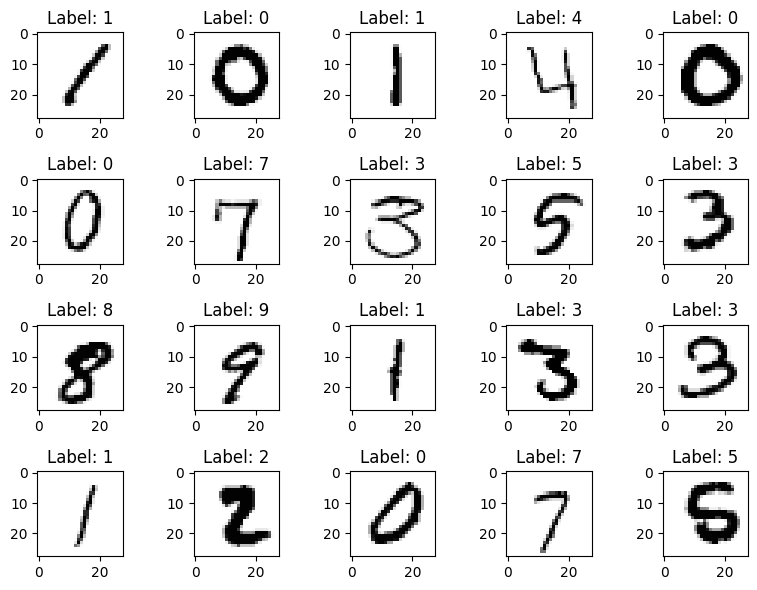

In [7]:
# Define the number of rows and columns for the subplots
num_rows = 4
num_cols = 5

# Create a figure with a number of subplots equal to the number of images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

# Loop over the rows and columns to plot the images
for i in range(num_rows):
    for j in range(num_cols):
        # Calculate the index of the corresponding image in the matrix
        index = i * num_cols + j
        
        # Get the label of the image from the mnist_df_train DataFrame
        label = mnist_df_train.loc[index, 'label']
        
        # Get the image data without the label column
        image_data = mnist_df_train.iloc[index, :-1].values
        
        # Plot the image in the corresponding subplot
        axes[i, j].imshow(image_data.reshape(28, 28), cmap='Greys')  # Reshape the data to 28x28 and plot in grayscale
        axes[i, j].set_title(f'Label: {label}')  # Set the title of the subplot as the image label

plt.tight_layout()  # Adjust the layout of the subplots to avoid overlapping labels
plt.show()  # Display the plot of subplots

# Chapter 2: Data Wrangling

### 2.1: Splitting Data

In this section, we'll split the data from mnist_df_train into training and validation sets to train our model, which will be used to predict the mnist_df_test dataset.

In [8]:
from sklearn.model_selection import train_test_split

# Separating the features (X) and the labels (y)
X = mnist_df_train.drop(columns=['label'])  # Features
y = mnist_df_train['label']  # Labels

# Performing stratified train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29777,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
41181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist_df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Checking the distribution of labels in the training and test sets
print("Distribution of labels in the training set:")
print(y_train.value_counts().sort_index())  # Printing the counts of each label in the training set, sorted by index
print("\nDistribution of labels in the test set:")
print(y_test.value_counts().sort_index())  # Printing the counts of each label in the test set, sorted by index

Distribution of labels in the training set:
label
0    3305
1    3747
2    3342
3    3481
4    3258
5    3036
6    3310
7    3521
8    3250
9    3350
Name: count, dtype: int64

Distribution of labels in the test set:
label
0    827
1    937
2    835
3    870
4    814
5    759
6    827
7    880
8    813
9    838
Name: count, dtype: int64


### 2.2: Scaling Pixel Values

Scaling the pixel values involves transforming them so that they fall within a specific range, typically between 0 and 1. This process is important for machine learning algorithms, as it helps standardize the features and ensures that they contribute equally to the model training process. 

In the case of images, pixel values are commonly scaled by dividing them by 255, which is the maximum value that a pixel can have in an 8-bit grayscale image. This transformation preserves the relative differences between pixel intensities while ensuring that they are within the desired range. By scaling the pixel values, we make it easier for the model to learn and improve its performance during training.

In [12]:
# Scaling the pixel values to a range between 0 and 1
X_train = X_train / 255  # Scaling the pixel values in the training set
X_test = X_test / 255    # Scaling the pixel values in the test set
mnist_df_test = mnist_df_test / 255    # Scaling the pixel values in the test set


### 2.3: Data Reshaping


The code below reshapes the feature arrays X_train and X_test to have a three-dimensional shape suitable for input into a convolutional neural network (CNN) or similar models that expect images in the format of height, width, and channels.

- "-1" indicates that the size of this dimension is inferred based on the total number of elements in the array and the sizes of the other dimensions. It allows us to reshape the array without explicitly specifying the size of this dimension.
- "28" represents the height of each image (28 pixels).
- "28" represents the width of each image (28 pixels).

The resulting shape of each array after reshaping is (number_of_samples, height, width), where number_of_samples is the total number of samples in the dataset. This reshaping prepares the image data to be compatible with convolutional layers in deep learning models.

In [13]:
# Reshaping the feature arrays to have a three-dimensional shape suitable for CNN input
X_train = X_train.values.reshape(-1, 28, 28)  # Reshaping the training set to have dimensions (-1, 28, 28)
X_test = X_test.values.reshape(-1, 28, 28)    # Reshaping the test set to have dimensions (-1, 28, 28)
mnist_df_test = mnist_df_test.values.reshape(-1, 28, 28)  # Reshape the test set to have dimensions (-1, 28, 28)

# Chapter 3: Creating and Testing Model

### 3.1: Feedforward NN Model

In [14]:
from tensorflow import keras

# Setting up the layers of the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flattens the input images from a 2D array (28x28 pixels) to a 1D array
    keras.layers.Dense(50, activation='relu'),   # Fully connected layer with 50 neurons and ReLU activation function
    keras.layers.Dense(50, activation='relu'),   # Another fully connected layer with 50 neurons and ReLU activation function
    keras.layers.Dense(10, activation='sigmoid') # Output layer with 10 neurons (for 10 classes) and sigmoid activation function
])    

# Compiling the neural network model
model.compile(optimizer='adam',  # Specifies the optimizer, in this case 'adam' which is an efficient gradient descent algorithm
              loss='sparse_categorical_crossentropy',  # Specifies the loss function for training, appropriate for classification tasks with integer labels
              metrics=['accuracy'])  # Specifies the evaluation metric to monitor during training, in this case, 'accuracy' which measures the proportion of correctly classified images

In [15]:
# training the Neural Network
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8110 - loss: 0.6674
Epoch 2/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9491 - loss: 0.1692
Epoch 3/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9645 - loss: 0.1227
Epoch 4/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9686 - loss: 0.1004
Epoch 5/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9759 - loss: 0.0757
Epoch 6/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9815 - loss: 0.0624
Epoch 7/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9855 - loss: 0.0489
Epoch 8/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9875 - loss: 0.0423
Epoch 9/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9872 - loss: 0.0412
Epoch 10/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0351
Epoch 11/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9900 - loss: 0.0295
Epoch 12/40
1050/1050 ━━━━━━━━

In [16]:
# Evaluating the model on the test data
# This will compute the loss and accuracy of the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Printing the accuracy achieved by the model on the test set
print(accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9677 - loss: 0.2207
0.9657142758369446


### 3.2: CNN Model

 Convolutional Neural Network

In [17]:
# Define the CNN model (model2)
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters of size 3x3
    keras.layers.MaxPooling2D((2, 2)),  # Max pooling layer with pool size 2x2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters of size 3x3
    keras.layers.MaxPooling2D((2, 2)),  # Max pooling layer with pool size 2x2
    keras.layers.Flatten(),  # Flatten layer to convert 2D feature maps into a 1D vector
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation function
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes) and softmax activation function
])

# Compile the CNN model (model2)
model2.compile(optimizer='adam',  # Adam optimizer
               loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy loss function
               metrics=['accuracy'])  # Accuracy metric for evaluation

In [18]:
# training the Neural Network
model2.fit(X_train, y_train, epochs=40)

Epoch 1/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8775 - loss: 0.3922
Epoch 2/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9822 - loss: 0.0542
Epoch 3/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9881 - loss: 0.0390
Epoch 4/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9933 - loss: 0.0209
Epoch 5/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9940 - loss: 0.0188
Epoch 6/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 7/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9964 - loss: 0.0119
Epoch 8/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9973 - loss: 0.0084
Epoch 9/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9970 - loss: 0.0086
Epoch 10/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9976 - loss: 0.0073
Epoch 11/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9983 - loss: 0.0051
Epoch 12

In [19]:
# Evaluating the model on the test data
# This will compute the loss and accuracy of the model on the test set
loss2, accuracy2 = model2.evaluate(X_test, y_test)

# Printing the accuracy achieved by the model on the test set
print(accuracy2)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0801
0.9917857050895691


In [20]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Chapter 4: Final Conclusions

### 4.1: Model Prediction Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


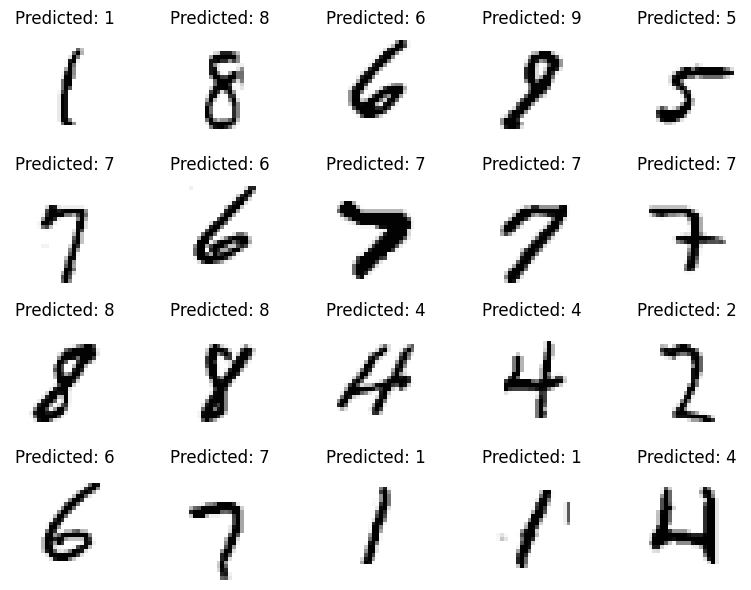

In [21]:
# Define the number of rows and columns for organizing the subplots
num_rows = 4
num_cols = 5

# Create a figure with a number of subplots equal to the number of images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

# Loop over the rows and columns to plot the images
for i in range(num_rows):
    for j in range(num_cols):
        # Calculate the index of the corresponding image
        index = i * num_cols + j
        
        # Plot the image
        axes[i, j].imshow(X_test[index].reshape(28, 28), cmap='Greys')
        
        # Make a prediction for the current image
        pred = model2.predict(X_test[index].reshape(1, 28, 28, 1))  # Reshape the image to match the model input shape
        predicted_label = pred.argmax()  # Get the index of the class with the highest predicted probability
        
        # Set the title of the subplot as the predicted label
        axes[i, j].set_title(f'Predicted: {predicted_label}')
        axes[i, j].axis('off')  # Remove the axes
        
plt.tight_layout()  # Adjust the layout of the subplots to avoid overlapping labels
plt.show()  # Display the plot

### 4.2: Generate and Save Prediction Submission

In [22]:
# Add the extra channel dimension
mnist_df_test = np.expand_dims(mnist_df_test, axis=-1)

# Predict classes for the test set
predictions = model2.predict(mnist_df_test)
# Convert probability predictions to predicted classes
predicted_classes = [prediction.argmax() for prediction in predictions]

# Create a DataFrame with the predictions
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),  # IDs das imagens (começando de 1)
    'Label': predicted_classes  # Classes preditas
})

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [23]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [24]:
# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully.")

Submission file created successfully.
